## Import libraries

In [3]:
import pandas as pd
import numpy as np

## Read the data 

In [4]:
data = pd.read_csv("../Data/NLPlabeledData.csv", sep="	")
data.drop(["id"], axis=1, inplace=True)
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


## Prepare the data

In [5]:
X = data["review"]
Y = data["sentiment"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(20000, 5000, 20000, 5000)

In [8]:
X_train = X_train.values
X_test = X_test.values 

## Clearing the data

In [9]:
from nltk.corpus import stopwords
import nltk # Natural Language Tool Kit
from bs4 import BeautifulSoup
import re

In [10]:
nltk.download("stopwords")
new_list = stopwords.words("english") # Download stopwords in English

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words = set(stopwords.words("english"))

In [12]:
def clean_sentence(sentence):
    sentence = BeautifulSoup(sentence, "lxml").get_text()
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    sentence = sentence.lower()
    words_list = sentence.split()
    words_list_cleaned = [word for word in words_list if word not in stop_words]
    return (" ".join(words_list_cleaned))

## Clear all data

In [13]:
X_train_all = []
X_test_all = []

for i in range(len(X_train)):
    if (i + 1) % 1000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_train_all.append(clean_sentence(X_train[i]))

for i in range(len(X_test)):
    if (i + 1) % 1000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_test_all.append(clean_sentence(X_test[i]))

C:\Users\mehme\AppData\Local\Temp\ipykernel_6376\1271128229.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").get_text()


999 sentence cleaned and loaded.
1999 sentence cleaned and loaded.
2999 sentence cleaned and loaded.
3999 sentence cleaned and loaded.
4999 sentence cleaned and loaded.
5999 sentence cleaned and loaded.
6999 sentence cleaned and loaded.
7999 sentence cleaned and loaded.
8999 sentence cleaned and loaded.
9999 sentence cleaned and loaded.
10999 sentence cleaned and loaded.
11999 sentence cleaned and loaded.
12999 sentence cleaned and loaded.
13999 sentence cleaned and loaded.
14999 sentence cleaned and loaded.
15999 sentence cleaned and loaded.
16999 sentence cleaned and loaded.
17999 sentence cleaned and loaded.
18999 sentence cleaned and loaded.
19999 sentence cleaned and loaded.
999 sentence cleaned and loaded.
1999 sentence cleaned and loaded.
2999 sentence cleaned and loaded.
3999 sentence cleaned and loaded.
4999 sentence cleaned and loaded.


## Tokenize the words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer(max_features=2000)

In [16]:
X_train_vectorized = vectorizer.fit_transform(X_train_all)
X_test_vectorized = vectorizer.transform(X_test_all)

X_train_vectorized = X_train_vectorized.toarray()
X_test_vectorized = X_test_vectorized.toarray()

## Get and train the models

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_regression_model = LogisticRegression(solver="lbfgs", max_iter=3000)
logistic_regression_model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=3000)

In [19]:
y_preds_log = logistic_regression_model.predict(X_test_vectorized)
y_preds_log

array([0, 0, 1, ..., 0, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
acc_log = accuracy_score(y_test, y_preds_log)
acc_log_percent = acc_log * 100
print(f"Logistic Regression Model's accuracy is % {acc_log_percent:.2f}")

Logistic Regression Model's accuracy is % 85.58


### GaussianNB

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train_vectorized, y_train)

GaussianNB()

In [24]:
y_preds_gnb = gaussianNB.predict(X_test_vectorized)
y_preds_gnb

array([0, 1, 1, ..., 0, 1, 1])

In [25]:
acc_gnb = accuracy_score(y_test, y_preds_gnb)
acc_gnb_percent = acc_gnb * 100
print(f"Gaussian Naive Bayes Model's accuracy is % {acc_gnb_percent:.2f}")

Gaussian Naive Bayes Model's accuracy is % 76.72


### BernoulliNB

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [27]:
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train_vectorized, y_train)

BernoulliNB()

In [28]:
y_preds_bnb = bernoulliNB.predict(X_test_vectorized)
y_preds_bnb

array([0, 1, 1, ..., 0, 1, 1])

In [29]:
acc_bnb = accuracy_score(y_test, y_preds_bnb)
acc_bnb_percent = acc_bnb * 100
print(f"Bernoulli Naive Bayes Model's accuracy is % {acc_bnb_percent:.2f}")

Bernoulli Naive Bayes Model's accuracy is % 85.68


### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [32]:
y_preds_dtc = decision_tree_classifier.predict(X_test_vectorized)
y_preds_dtc

array([0, 0, 1, ..., 0, 1, 1])

In [33]:
acc_dtc = accuracy_score(y_test, y_preds_dtc)
acc_dtc_percent = acc_dtc * 100
print(f"Decision Tree Classifier Model's accuracy is % {acc_dtc_percent:.2f}")

Decision Tree Classifier Model's accuracy is % 71.36


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [36]:
y_preds_rf = random_forest_classifier.predict(X_test_vectorized)
y_preds_rf

array([0, 0, 1, ..., 0, 1, 1])

In [37]:
acc_rf = accuracy_score(y_test, y_preds_rf)
acc_rf_percent = acc_rf * 100
print(f"Random Forest Classifier Model's accuracy is % {acc_rf_percent:.2f}")

Random Forest Classifier Model's accuracy is % 84.30


## Visualize the confusion matrix

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
cm_log = confusion_matrix(y_test, y_preds_log)
cm_log

array([[2155,  371],
       [ 350, 2124]])

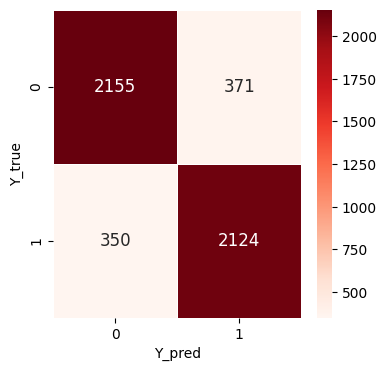

In [40]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_log, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## Best model to choose is Logistic Regression Model with % 85.5 accuracy.

## Give Manual Data

In [41]:
sentences = ["It is the best thing I have ever seen.", "It made me disappointed.", "Thank you so much for everything", "This is the third film I have watched today and I can easily say that this one is the best for me.", "I did not feel bored at any moment of the film.", "Do not watch it.", "I do not suggest it.", "It is worthless.", "It is good."]
sentences_cleaned = []

for sentence in sentences:
    sentences_cleaned.append(clean_sentence(sentence))

sentences_cleaned

['best thing ever seen',
 'made disappointed',
 'thank much everything',
 'third film watched today easily say one best',
 'feel bored moment film',
 'watch',
 'suggest',
 'worthless',
 'good']

In [42]:
sentences_cleaned_vectorized = vectorizer.transform(sentences_cleaned)
sentences_cleaned_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 24 stored elements and shape (9, 2000)>

In [43]:
y_pred_manual = logistic_regression_model.predict(sentences_cleaned_vectorized)
y_pred_manual

array([1, 0, 1, 1, 0, 0, 1, 0, 1])

In [44]:
emotion_dict = {0: "Unhappy", 1: "Happy"}

for idx, sentence in enumerate(sentences):
    print(f"The review '{sentence}' expresses '{emotion_dict[y_pred_manual[idx]]}'.")

The review 'It is the best thing I have ever seen.' expresses 'Happy'.
The review 'It made me disappointed.' expresses 'Unhappy'.
The review 'Thank you so much for everything' expresses 'Happy'.
The review 'This is the third film I have watched today and I can easily say that this one is the best for me.' expresses 'Happy'.
The review 'I did not feel bored at any moment of the film.' expresses 'Unhappy'.
The review 'Do not watch it.' expresses 'Unhappy'.
The review 'I do not suggest it.' expresses 'Happy'.
The review 'It is worthless.' expresses 'Unhappy'.
The review 'It is good.' expresses 'Happy'.
